<a href="https://colab.research.google.com/github/KalikaKay/Author-Classification-Project/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis 
*for the Author Classification Project*

A selection of text files have been stored in the location listed below. 
```
# file location
PATH = '/content/drive/MyDrive/Author Classification/Books'
```

The data is structured by author with each text file representing a different work or series of works as was pulled from various sources. 

The goal of the project is to predict authors based on content. 

Perform exploratory data analysis, clean and update the text files such that they can be used for modeling. 

It is anticipated that the data will be modeled using the following libraries:
1. Bag of Words
2. TF-IDF
3. word2vec
4. supervised models: 
> Naive Bayes, Logistic Regression, Decision Tree, Random Forest, KNN, SVM and Gradient Boosting
5. RNN
6. unsupervised technique
> visualize bar graphs for clusters containing 10 author documents. Adjust by silhouette scores.
7. LSA
8. LDA
9. NNMF

## Preprocessing

Import the files using the NLTK plain text corpus reader. Review the data. Ask some questions. Make some decisions. 

In [ ]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def corpus_stats(corpus):
  print("corpus statistics:")
  print(f'Number of Documents: {str(len(corpus.fileids()))}')
  print(f'Number of paragraphs: {str(len(corpus.paras()))}')
  print(f'Number of sentences: {str(len(corpus.sents()))}')
  print(f'Number of words: {str(len(corpus.words()))}')
  print(f'Vocabulary: {str(len(set(w.lower() for w in corpus.words())))}')
  print(f'avg chars per word: {str(round(len(corpus.raw())/len(corpus.words()), 1))}')
  print(f'avg words per sentence: {str(round(len(corpus.words())/len(corpus.sents()), 1))}')

In [ ]:
# file location
PATH = '/content/drive/MyDrive/Author Classification/Books'
DOC_PATTERN = r'.*\.txt'

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)


In [ ]:
corpus_stats(corpus)

corpus statistics:
Number of Documents: 12
Number of paragraphs: 24960
Number of sentences: 75722
Number of words: 1424981
Vocabulary: 26173
avg chars per word: 4.6
avg words per sentence: 18.8


In [ ]:
corpus.fileids()

['Anne Bronte/book6.txt',
 'Bell AKA Bronte Sisters/book10.txt',
 'Charlotte Bronte/book5.txt',
 'Edith Rickert & Gleb Botkin/book7.txt',
 'Emily Bronte/book4.txt',
 'Ethel M. Dell/book8.txt',
 'Ethel M. Dell/book9.txt',
 'Fyodor Dostoevsky/book2.txt',
 'Fyodor Dostoevsky/book3.txt',
 'Jane Austen/book0.txt',
 'Jane Austen/book1.txt',
 'Various/book11.txt']

In [ ]:
corpus.paras(fileids=['Anne Bronte/book6.txt'])

[[['ï', '»¿', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'Agnes', 'Grey', ',', 'by', 'Anne', 'BrontÃ', '«']], [['This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.'], ['You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're', '-', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', '.', 'gutenberg', '.', 'org', '.'], ['If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', ',', 'you', "'", 'll', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', '.']], ...]

In [ ]:
corpus.paras(fileids=['Jane Austen/book0.txt'])

[[['ï', '»¿', 'Project', 'Gutenberg', "'", 's', 'Love', 'And', 'Freindship', 'And', 'Other', 'Early', 'Works', ',', 'by', 'Jane', 'Austen']], [['This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.'], ['You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're', '-', 'use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www', '.', 'gutenberg', '.', 'org']], ...]

The text files contain unwanted characters and need to be ridded of them.

**What methods should I use to get rid of these extra characters?**

I have extra text in the document - some type of Gutenberg introduction that I know is not by the author. 

**Where to start and end each document?**

At least one of these documents is by more than one author. 

**How do I identify, find, learn who the author is in these documents?**

**Do I want the author's names in these documents?** 

**What method shall I use to rid the document of tables of contents, chapter titles, document titles, etc.?** 

###Beginning and End of Document

Regarding the Gutenberg's introductions and endings: Can I isolate these paragraphs?

Specifically, I want the last paragraph of the Gutenberg introduction and the first paragraph of the Gutenberg ending. If I can identify key phrases/words for each of these paragraphs, I can drop the paragraphs and save the file.



In [ ]:
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from gensim.summarization import keywords
import nltk
import re
import requests
import os


!pip install rake_nltk --quiet
from rake_nltk import Rake
nltk.download('punkt')

# file location
PATH = '/content/drive/MyDrive/Author Classification/Books'
DOC_PATTERN = r'.*\.txt'

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#How many times does this appear in the docs? 
commonpara = corpus.paras(fileids=['Anne Bronte/book6.txt'])[6]
commonpara[0]

['Character', 'set', 'encoding', ':', 'UTF', '-', '8']

In [ ]:
#Which files contain this character set encoding text?
i = 0
encids = []
for fileid in corpus.fileids():
  paras = corpus.paras(fileids=fileid)
  for para in paras:
    if para == commonpara:
      encids.append(fileid)

encids

['Anne Bronte/book6.txt',
 'Bell AKA Bronte Sisters/book10.txt',
 'Edith Rickert & Gleb Botkin/book7.txt',
 'Emily Bronte/book4.txt',
 'Fyodor Dostoevsky/book2.txt',
 'Jane Austen/book0.txt',
 'Jane Austen/book1.txt']

In [ ]:
#Title.
corpus.paras(fileids=['Anne Bronte/book6.txt'])[7:13]

[[['***',
   'START',
   'OF',
   'THIS',
   'PROJECT',
   'GUTENBERG',
   'EBOOK',
   'AGNES',
   'GREY',
   '***']],
 [['Produced', 'by', 'David', 'Price']],
 [['Agnes', 'Grey', 'A', 'NOVEL', ',']],
 [['by', 'ACTON', 'BELL', '.']],
 [['LONDON',
   ':',
   'THOMAS',
   'CAUTLEY',
   'NEWBY',
   ',',
   'PUBLISHER',
   ',',
   '72',
   ',',
   'MORTIMER',
   'ST',
   '.,',
   'CAVENDISH',
   'SQ',
   '.']],
 [['1847', '.']]]

In [ ]:
i = 0
fileids = []
paraindex = []  #index of the gutenberg paragraphs.
onesent = [] #single sentence paragraphs.
commonsent = ['***', 'START', 'OF', 'PROJECT','GUTENBERG',]
delimiter = ['\x80\x9c'] #recognizable delimiter for author single paragraphs.
for fileid in corpus.fileids():
  paras = corpus.paras(fileid)
  for para in paras:
    if set(commonsent).issubset(para[0]):
      fileids.append(fileid)
      paraindex.append(paras.index(para)+1)
      
fileids

['Anne Bronte/book6.txt',
 'Bell AKA Bronte Sisters/book10.txt',
 'Charlotte Bronte/book5.txt',
 'Edith Rickert & Gleb Botkin/book7.txt',
 'Emily Bronte/book4.txt',
 'Ethel M. Dell/book8.txt',
 'Ethel M. Dell/book9.txt',
 'Fyodor Dostoevsky/book2.txt',
 'Fyodor Dostoevsky/book3.txt',
 'Jane Austen/book0.txt',
 'Jane Austen/book1.txt',
 'Various/book11.txt']

In [ ]:
remaining = list(set(corpus.fileids()) - set(fileids))
remaining

[]

In [ ]:
i = 0

for fileid in fileids:
  print(corpus.paras(fileid)[paraindex[i]])
  i += 1    

[['Produced', 'by', 'David', 'Price']]
[['POEMS']]
[['Produced', 'by', 'David', 'Edwards', ',', 'Mary', 'Glenn', 'Krause', ',', 'Eleni', 'Christofaki', 'and', 'the', 'Online', 'Distributed', 'Proofreading', 'Team', 'at', 'http', '://', 'www', '.', 'pgdp', '.', 'net', '(', 'This', 'book', 'was', 'produced', 'from', 'a', 'file', 'downloaded', 'from', 'the', 'British', 'Library', ')']]
[['Produced', 'by', 'Tim', 'Lindell', ',', 'David', 'E', '.', 'Brown', ',', 'and', 'the', 'Online', 'Distributed', 'Proofreading', 'Team', 'at', 'http', '://', 'www', '.', 'pgdp', '.', 'net', '(', 'This', 'file', 'was', 'produced', 'from', 'images', 'generously', 'made', 'available', 'by', 'The', 'Internet', 'Archive', '/', 'American', 'Libraries', '.)']]
[['Transcribed', 'from', 'the', '1910', 'John', 'Murray', 'edition', 'by', 'David', 'Price']]
[['Produced', 'by', 'Al', 'Haines', '.']]
[['E', '-', 'text', 'prepared', 'by', 'Suzanne', 'Shell', ',', 'Project', 'Gutenberg', 'Beginners', 'Projects', ',', 'Ma

In [ ]:
#Get the last paragraph of the text (author's work). 
print(corpus.paras(fileids[0])[-55])

[['End', 'of', 'the', 'Project', 'Gutenberg', 'EBook', 'of', 'Agnes', 'Grey', ',', 'by', 'Anne', 'BrontÃ', '«']]


In [ ]:
i = 0
fileids = []
licenseindex = []  #index of the gutenberg license paragraphs.
commonsent = ['END', 'PROJECT', 'GUTENBERG',]
for fileid in corpus.fileids():
  paras = corpus.paras(fileid)
  for para in paras:
    bigsent = [w.upper() for w in para[0]]
    if set(commonsent).issubset(bigsent) and fileid not in fileids:
      fileids.append(fileid)
      licenseindex.append(paras.index(para))
      
fileids

['Anne Bronte/book6.txt',
 'Bell AKA Bronte Sisters/book10.txt',
 'Charlotte Bronte/book5.txt',
 'Edith Rickert & Gleb Botkin/book7.txt',
 'Emily Bronte/book4.txt',
 'Ethel M. Dell/book8.txt',
 'Ethel M. Dell/book9.txt',
 'Fyodor Dostoevsky/book2.txt',
 'Fyodor Dostoevsky/book3.txt',
 'Jane Austen/book0.txt',
 'Jane Austen/book1.txt',
 'Various/book11.txt']

In [ ]:
remaining = list(set(corpus.fileids()) - set(fileids))
remaining

[]

In [ ]:
for i in range(0, len(fileids)-1):
  print(corpus.paras(fileids[i])[paraindex[i]:licenseindex[i]])

[[['Produced', 'by', 'David', 'Price']], [['Agnes', 'Grey', 'A', 'NOVEL', ',']], ...]
[[['POEMS']], [['by', 'Currer', ',', 'Ellis', ',', 'And', 'Acton', 'Bell']], ...]
[[['Produced', 'by', 'David', 'Edwards', ',', 'Mary', 'Glenn', 'Krause', ',', 'Eleni', 'Christofaki', 'and', 'the', 'Online', 'Distributed', 'Proofreading', 'Team', 'at', 'http', '://', 'www', '.', 'pgdp', '.', 'net', '(', 'This', 'book', 'was', 'produced', 'from', 'a', 'file', 'downloaded', 'from', 'the', 'British', 'Library', ')']], [['Transcriber', "'", 's', 'note']], ...]
[[['Produced', 'by', 'Tim', 'Lindell', ',', 'David', 'E', '.', 'Brown', ',', 'and', 'the', 'Online', 'Distributed', 'Proofreading', 'Team', 'at', 'http', '://', 'www', '.', 'pgdp', '.', 'net', '(', 'This', 'file', 'was', 'produced', 'from', 'images', 'generously', 'made', 'available', 'by', 'The', 'Internet', 'Archive', '/', 'American', 'Libraries', '.)']], [['THE', 'BOJABI', 'TREE']], ...]
[[['Transcribed', 'from', 'the', '1910', 'John', 'Murray', 

In [ ]:
for fileid in fileids:
  print(fileid.split('/')[0])

Anne Bronte
Bell AKA Bronte Sisters
Charlotte Bronte
Edith Rickert & Gleb Botkin
Emily Bronte
Ethel M. Dell
Ethel M. Dell
Fyodor Dostoevsky
Fyodor Dostoevsky
Jane Austen
Jane Austen
Various


### Extra Characters

Remove all of the unwanted characters.

In [ ]:
#Clean the text
def cleaner(text, limit=0):
    "Extract relevant text from DataFrame using a regex"
    # Regex pattern for only alphanumeric, hyphenated text with 3 or more chars
    pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
    return re.findall(pattern, text)
    

In [ ]:
i = 0
intro_set = ['***', 'START', 'OF', 'PROJECT','GUTENBERG',]
license_set = ['END', 'PROJECT', 'GUTENBERG',]
cleansent = ''
PATH = '/content/drive/MyDrive/Author Classification/AuthorTexts'
DOC_PATTERN = r'.*\.txt'

for fileid in corpus.fileids():
  paras = corpus.paras(fileid)
  author = fileid.split('/')[0]
  for para in paras:
    bigsent = [w.upper() for w in para[0]]
    
    if set(intro_set).issubset(para[0]):
      introindex = paras.index(para)+1
    if set(license_set).issubset(bigsent):
      licenseindex = paras.index(para)

  #store this in an authortext folder for analysis on authors.
  #loop through the text paragraphs.
  for para in paras[introindex:licenseindex]:
    #loop throuh the sentences:
    for sent in para:
      #clean the sentences
      cleansent += ' '.join(cleaner(' '.join(sent))) + ' '
    cleansent += '\n'  
      
  #open and save the text to a file.
  folder = PATH + f'/{author}/'
  if not os.path.exists(folder):
      os.makedirs(folder)
  #save the text
  with open(folder + f'works.txt', 'a+') as f:
      f.write(cleansent)
  cleansent = '' #reset the sentences.


## Authors

It is assumed that the end user of this product will not care whether or not the author's name is inside the text document. 

For the purpose of training and testing the models, remove reference to the author to the best of my ability. 

A cleaner text file, without punctuation, words < 3 characters, the gutenberg's introductions and license, and organized into a single text file for the authors is located at:
PATH = '/content/drive/MyDrive/Author Classification/AuthorTexts'


Various authors and the bell compilation will still need to be pulled out. 

In [1]:
#Open the text files for exploration. 
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from gensim.summarization import keywords
import nltk
import re
import requests
import os

!pip install rake_nltk --quiet
from rake_nltk import Rake
nltk.download('punkt')
nltk.download('wordnet')

import pandas as pd
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import spacy


# file location
PATH = '/content/drive/MyDrive/Author Classification/AuthorTexts'
DOC_PATTERN = r'.*\.txt'

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

def corpus_stats(corpus):
  print("corpus statistics:")
  print(f'Number of Documents: {str(len(corpus.fileids()))}')
  print(f'Number of paragraphs: {str(len(corpus.paras()))}')
  print(f'Number of sentences: {str(len(corpus.sents()))}')
  print(f'Number of words: {str(len(corpus.words()))}')
  print(f'Vocabulary: {str(len(set(w.lower() for w in corpus.words())))}')
  print(f'avg chars per word: {str(round(len(corpus.raw())/len(corpus.words()), 1))}')
  print(f'avg words per sentence: {str(round(len(corpus.words())/len(corpus.sents()), 1))}')

corpus_stats(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
corpus statistics:
Number of Documents: 9
Number of paragraphs: 295
Number of sentences: 295
Number of words: 854345
Vocabulary: 23747
avg chars per word: 5.9
avg words per sentence: 2896.1


It looks like the data cleaning process and format that I've taken has significanly decreased the amount of text I'm using. I can also assume that there are no longer paragraphs associated with the corpus. 

This initial setup suggests that I might have to go back to the cleaning process and clean up the extra text a little further. Before I do that, I want to conduct some additional analysis about the texts that I've pulled. 

Also note the number of words has decreased from 1.4 million to 854k. My vocubulary; however, hasn't decreased as much - which is what I think I should want to see. 

I now have an average of 2800 words per sentence. I was looking at 20, previously. These statistickes make sense. I removed the punctuation.

In [2]:
#look at all those authors.
for fileid in corpus.fileids():
  print(fileid.split('/')[0])

Anne Bronte
Bell AKA Bronte Sisters
Charlotte Bronte
Edith Rickert & Gleb Botkin
Emily Bronte
Ethel M. Dell
Fyodor Dostoevsky
Jane Austen
Various


In [3]:
docs = [(fileid.split('/')[0], corpus.raw(fileid)) for fileid in corpus.fileids()]

In [4]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

tokenized = [(doc[0], word_tokenize(doc[1].lower())) for doc in docs if tokenizer.tokenize(doc[1].lower()) not in stopwords.words('english')]

In [30]:
len(tokenized[1][1])

26014

In [6]:
# Lemmatize the tokens. 
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
stem = ''
lemma = ''
stemmed = []
lemmatized = []
for doc in tokenized:
  author = doc[0]
  stem = ''
  lemma = ''
  for token in doc[1]:
      stem = stem + ' ' + stemmer.stem(token)
      lemma = lemma + ' ' + lemmatizer.lemmatize(token)
  stemmed.append(stem)
  lemmatized.append(lemma)

Gensim keywords seems to have a disliking to one or more of these texts. I don't know why, but the system crashes.

I just want to take a glimpse at the keywords for a few of them. 

In [ ]:
keys = []
i = 0
for doc in stemmed[0:5]:
  keys.append(keywords(doc, words=5).split('\n'))

In [9]:
keys

[['littl', 'like', 'veri', 'onli', 'said'],
 ['thi', 'heart', 'thee', 'thou', 'love', 'loveli'],
 ['donel', 'light', 'veri', 'like', 'man'],
 ['illustr', 'said', 'bojabi', 'pinki', 'rat'],
 ['heathcliff', 'catherin', 'linton', 'said', 'littl']]

In [7]:
#Named Entity Recognition by Author
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 1500000
spacy_docs = [(doc[0], nlp(doc[1])) for doc in docs]

In [8]:
#investigating novel sizes, in case of errors. 
for doc in spacy_docs:
  print(doc[0],': ', len(doc[1]))

Anne Bronte :  53103
Bell AKA Bronte Sisters :  27002
Charlotte Bronte :  7406
Edith Rickert & Gleb Botkin :  2442
Emily Bronte :  91470
Ethel M. Dell :  229488
Fyodor Dostoevsky :  255785
Jane Austen :  152025
Various :  60237


In [132]:
def author_entities(text):
  b = []
  for entity in text[1].ents:
    b.append((text[0], entity.text.lower(), entity.label_))
  return pd.DataFrame(b, columns=['author', 'name', 'type'])

In [133]:
max_limit = 150000
#Named Entity Recognition DataFrame 
for doc in spacy_docs:
  try:
    entities = pd.concat([entities, author_entities(doc)])
  except NameError: 
    entities = author_entities(doc)


In [134]:
entities.describe(include='all')

,author,name,type
count,38248,38248,38248
unique,9,6449,18
top,Fyodor Dostoevsky,one,PERSON
freq,10148,1437,17875


In [135]:
entities.tail()

,author,name,type
3376,Various,astounding stories,ORG
3377,Various,first,ORDINAL
3378,Various,norton,ORG
3379,Various,ashtabula ohio,PERSON
3380,Various,april 1930,DATE


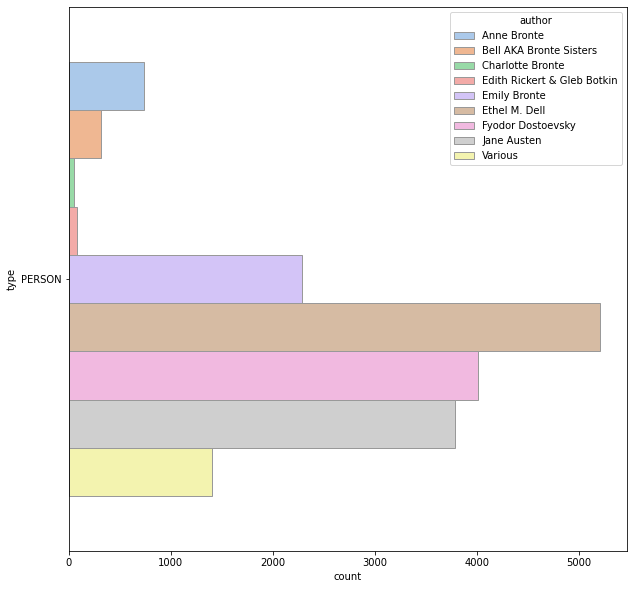

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
 
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y="type", hue="author", 
            palette="pastel", edgecolor=".6",
            data=entities[entities.type == 'PERSON'])
plt.show()

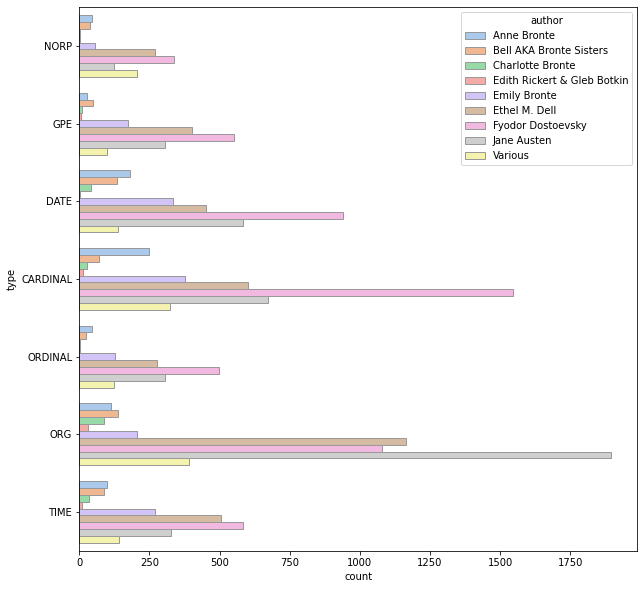

In [137]:
mid_range = entities.type.value_counts()[(entities.type.value_counts() >= 700) & (entities.type.value_counts() <= 10000)].keys()
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y="type", hue="author", 
            palette="pastel", edgecolor=".6",
            data=entities[entities.type.isin(mid_range)])
plt.show()

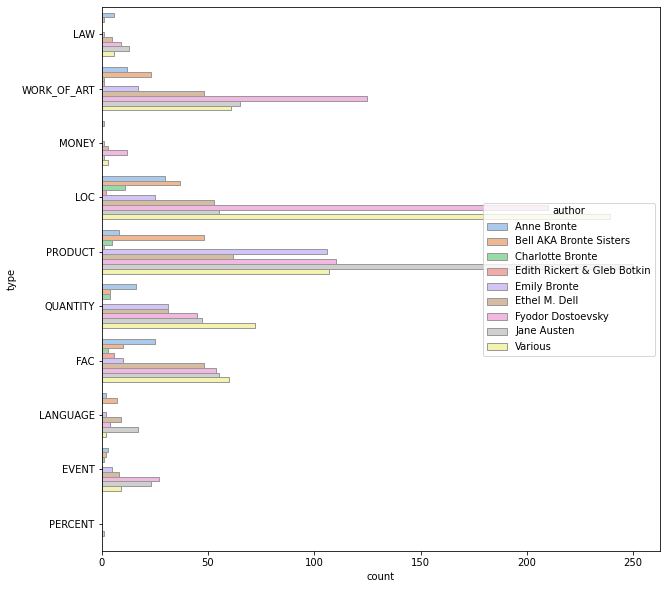

In [138]:
low_range = entities.type.value_counts()[(entities.type.value_counts() < 700)].keys()
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y="type", hue="author", 
            palette="pastel", edgecolor=".6",
            data=entities[entities.type.isin(low_range)])
plt.show()

### Investigation

This is a brief investigation to determine if entity locations can be identified using the name entities recognition start and end indicators that are provided in the document. 

In [117]:
#With this code, can I locate the authors? People and organization. 
for doc in spacy_docs:
  test = [[doc[0], entity.text, entity.label_, entity.start, entity.end] for entity in doc[1].ents if entity.label_ if entity.label_ in ['PERSON', 'ORG']]
test

[['Various', 'Greg Weeks', 'PERSON', 1, 3],
 ['Various', 'Meredith Bach', 'PERSON', 3, 5],
 ['Various', 'CLAYTON Publisher HARRY BATES', 'ORG', 30, 34],
 ['Various', 'DOUGLAS DOLD', 'PERSON', 35, 37],
 ['Various', 'The Clayton Standard Magazine Guarantees', 'ORG', 40, 45],
 ['Various', 'the Authors League America', 'ORG', 63, 67],
 ['Various', 'Union', 'ORG', 73, 74],
 ['Various', 'Clayton', 'ORG', 97, 98],
 ['Various', 'ACE HIGH MAGAZINE', 'ORG', 101, 104],
 ['Various', 'Clayton Magazines', 'ORG', 148, 150],
 ['Various', 'VOL', 'ORG', 151, 152],
 ['Various', 'CONTENTS', 'ORG', 153, 154],
 ['Various', 'Scene Monsters Moyen  \n', 'ORG', 165, 169],
 ['Various', 'THOMAS KNIGHT', 'PERSON', 174, 176],
 ['Various', 'Jerry Eyes', 'PERSON', 177, 179],
 ['Various', 'Leslie Larner', 'PERSON', 229, 231],
 ['Various',
  'Vampires That Are Ravaging the Inhabitants Venus',
  'ORG',
  242,
  249],
 ['Various', 'Planetara Towards', 'PERSON', 263, 265],
 ['Various', 'Rays Allen Baker', 'PERSON', 295, 2

In [104]:
corpus.raw(fileids=['Various/works.txt'])[30860:]

'liner like figurehead peering into the storm under the vessel forefoot \nThat gentleman milady repeated the steward obsequiously That Prester Kleig head the Secret Agents Master the Secret Room just now returning from Madagascar via Europe after visit the realm Moyen \ngasp terror burst from the lips the woman Her cheeks blanched \nMoyen She almost whispered Moyen The half god Asia whom men call mad \nNot mad milady Moyen not mad save with lust for power the conqueror the ages already ruling more the earth population than any man has ever done before him even Alexander \nBut the young lady was not listening stewards Wealthy young ladies did not save when asked questions dealing with personal service themselves Her eyes devoured the slender man who stood the prow the Stellar while her lips shaped over and over again the dread name which was the lips the people the world \nMoyen Moyen \n \nthe prow Prester Kleig who carried dread secret his breast knew the young lady regard gave sign Th

It would appear that I cannot update the raw text file using locations provided in the named entity recognition pattern. 

### Frequency

Let's see how many authors have certain people and organizations in common usages of their texts.

In [211]:
#The persons
persons = entities[entities.type.isin(['PERSON', 'ORG'])]

In [212]:
persons = persons.groupby(by='name', as_index=False)['author']

In [216]:
people = persons.nunique().sort_values(by='author', ascending=False)
people.describe()

,author
count,3517.000000
mean,1.101223
std,0.448092
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,7.000000


In [217]:
people[people.author >= 5]

,name,author
2132,moon,7
2794,shall,6
772,don,6
3216,time,6
1026,farewell,5
2057,messenger,5
509,chapter,5
3162,thee,5
740,didn,5
3195,thou,5


Silly questions. 

Can a prediction model/classification model determine an author based solely off of entity recognition? Can I feed these results to a model and will it be able to classify the author without qualms? 

What does a unsupervised model have to say about these entities? Anything? We see people, organizations, time, ordinals, cardinals, authors, would I learn anything from an unsupervised learning model? Would it begin to think that Carlos Kane is someone who wrote a book in the various text titles? 

The former question is outside the scope of this project. An unsupervised learning model was assigned to the project with no specifications as to how it should/may be implemented. 

## Table of Contents, Credits, Acknowledgements, Chapter Headers


In [3]:
#Open the text files for exploration. 
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from gensim.summarization import keywords
import nltk
import re
import requests
import os

!pip install rake_nltk --quiet
from rake_nltk import Rake
nltk.download('punkt')
nltk.download('wordnet')

import pandas as pd
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import spacy


# file location
PATH = '/content/drive/MyDrive/Author Classification/AuthorTexts'
DOC_PATTERN = r'.*\.txt'

corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

def corpus_stats(corpus):
  print("corpus statistics:")
  print(f'Number of Documents: {str(len(corpus.fileids()))}')
  print(f'Number of paragraphs: {str(len(corpus.paras()))}')
  print(f'Number of sentences: {str(len(corpus.sents()))}')
  print(f'Number of words: {str(len(corpus.words()))}')
  print(f'Vocabulary: {str(len(set(w.lower() for w in corpus.words())))}')
  print(f'avg chars per word: {str(round(len(corpus.raw())/len(corpus.words()), 1))}')
  print(f'avg words per sentence: {str(round(len(corpus.words())/len(corpus.sents()), 1))}')

corpus_stats(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
corpus statistics:
Number of Documents: 9
Number of paragraphs: 295
Number of sentences: 295
Number of words: 854345
Vocabulary: 23747
avg chars per word: 5.9
avg words per sentence: 2896.1


In [4]:
#Dataframe of sentences and authors.
for fileid in corpus.fileids():
  book = pd.DataFrame(corpus.raw(fileids=fileid).split('\n'), columns=['sentence'])
  book['author'] = fileid.split('/')[0]
  try:
    books = pd.concat([books, book])
  except NameError: 
    books = book

In [5]:
#Remove empty strings.
books = books.replace(r'^\s*$', np.NaN, regex=True)
books.dropna(inplace=True)
books.reindex()

#Remove contents and Chapter Titles.
i = 0
for sent in books.sentence:
  if any(c.islower() for c in sent) == False:
    books.iloc[i] = np.NaN
  if 'project gutenberg' in sent.lower():
    books.iloc[i] = np.NaN    
  if 'contents' == sent.lower().strip():
    books.iloc[i] == np.NaN
  i += 1

books.dropna(inplace=True)
books.reindex()

,sentence,author
0,Produced David Price,Anne Bronte
1,Agnes Grey NOVEL,Anne Bronte
5,Illustration Birthplace Charlotte Emily and An...,Anne Bronte
6,Contents,Anne Bronte
9,All true histories contain instruction though ...,Anne Bronte
...,...,...
2452,Dear Editor,Various
2453,have read the first copy Astounding Stories an...,Various
2454,Congratulations,Various
2455,Dear Editor,Various


In [6]:
content_index = books[books.sentence == 'Contents '].index.values
books.drop(content_index, inplace=True)

In [13]:
#Number of characters in each sentence, per author
books['length'] = [len(sen) for sen in books.sentence]
books.groupby(by='author').describe()

length              ...                 
                              count        mean  ...     75%      max
author                                           ...                 
Anne Bronte                   934.0  332.932548  ...  498.75   3299.0
Bell AKA Bronte Sisters       884.0  167.628959  ...  198.00   2741.0
Charlotte Bronte              110.0  391.136364  ...  276.50   4965.0
Edith Rickert & Gleb Botkin   191.0   60.717277  ...   79.00    381.0
Emily Bronte                 1922.0  278.165973  ...  369.00   3301.0
Ethel M. Dell                8629.0  145.794994  ...  181.00   2160.0
Fyodor Dostoevsky            5574.0  266.101722  ...  274.75  13267.0
Jane Austen                  2675.0  333.707290  ...  410.50  12284.0
Various                      2204.0  157.271325  ...  221.00   1119.0

[9 rows x 8 columns]

I think the data is clean at this point. The preferred mode of delivery will be to copy the cells into the modeling notebook.

#Conclusion

This was a fine exploration of the Gutenberg collection of documents. I've learned plenty. 

While named entity recognition can be used to provide a visual representation as to whether or not keywords are commonly used among multiple authors; they, at least in this context, do not provide much use in the data cleaning process. 

In the future, I will take care to complete the data cleaning process in its entirety before conducting the analysis. This means, removing chapter titles, the table of contents, and - at least TRYING - to identify and remove references to author's names prior to performing the analysis.

I think that it is fine, here. I wanted to learn whether or not named entity recognition could prove useful for such an endeavor and I have seen that, in this case, it does not. 

Perhaps, in time, it will. 


---
*a Thinkful project by Kalika Kay Curry*

